In [3]:
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
data=datasets.load_wine()
data.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

<Figure size 1080x504 with 0 Axes>

Accur on training set: 0.895
Accur on test set: 0.844


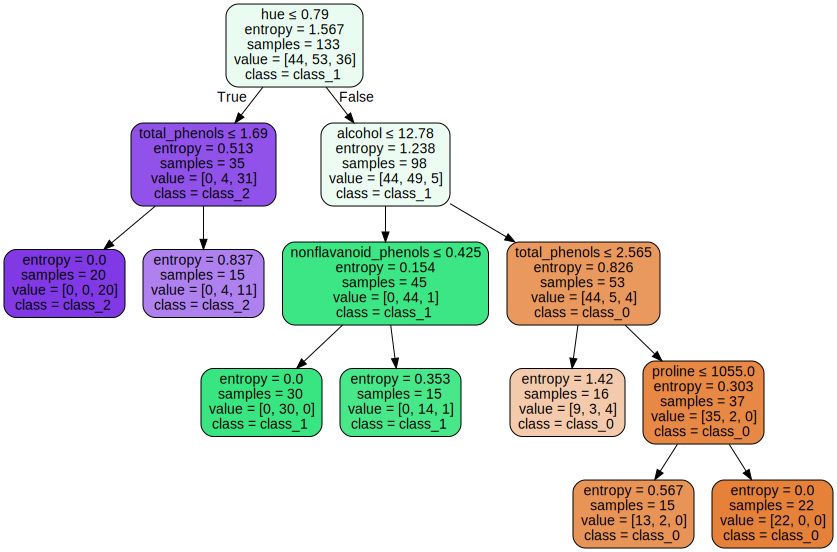

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, random_state=42)

from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='entropy', 
                             min_samples_split = 20, 
                             min_samples_leaf = 15, 
                             max_features="sqrt", 
                             max_leaf_nodes=12, 
                             random_state=0)
dtree.fit(X_train, y_train)

print("Accur on training set: {:,.3f}".format(dtree.score(X_train, y_train)))
print("Accur on test set: {:,.3f}".format(dtree.score(X_test, y_test)))

from sklearn.tree import export_graphviz
export_graphviz(dtree, out_file="tree.dot",
               feature_names=data.feature_names,
               class_names=data.target_names,
               filled=True, rounded=True,
               special_characters=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


Accuracy on train: 0.992
Accuracy on test: 0.978


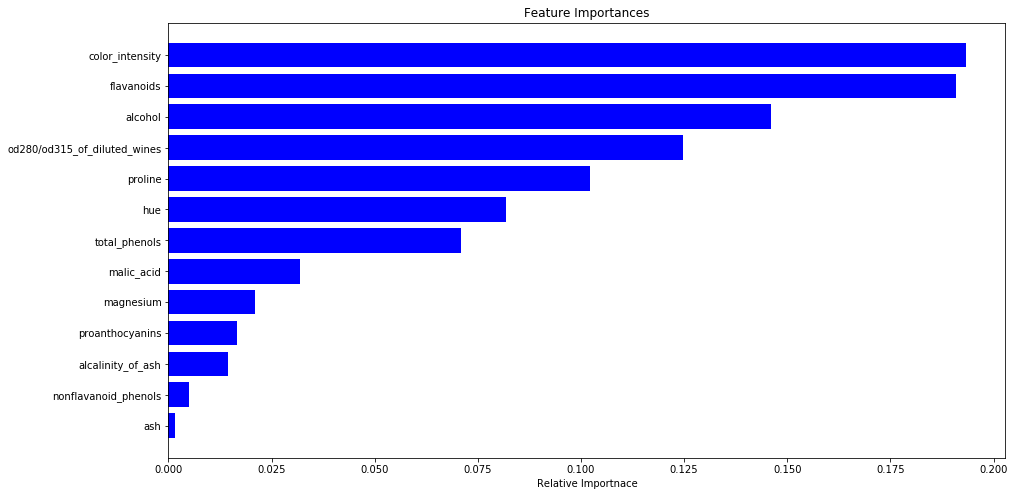

In [13]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,8))

from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=50,
                             criterion='entropy',
                             min_samples_split = 20,
                             min_samples_leaf = 15,
                             max_features="sqrt",
                             max_leaf_nodes=12,
                             random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on train: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test: {:.3f}".format(forest.score(X_test, y_test)))

import numpy as np
import matplotlib.pyplot as plt
importances = forest.feature_importances_

features = data['feature_names']
indicies = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indicies)), importances[indicies], color='b', align='center')
plt.yticks(range(len(indicies)), [features[i] for i in indicies])
plt.xlabel('Relative Importnace')
plt.show()

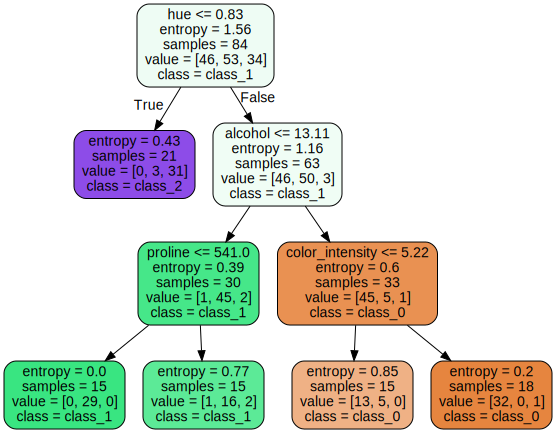

In [16]:
estimator = forest.estimators_[29]

from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='rftree.dot',
               feature_names = data.feature_names,
               class_names = data.target_names,
               rounded = True, proportion = False,
               precision = 2, filled = True)

import graphviz
with open("rftree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

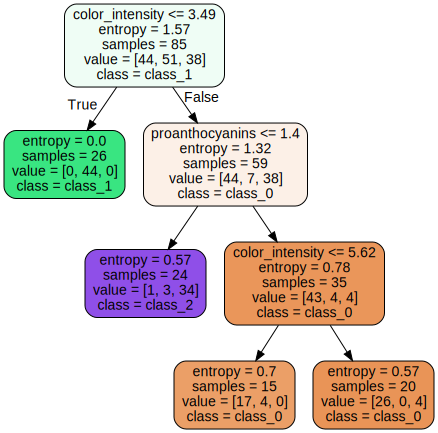

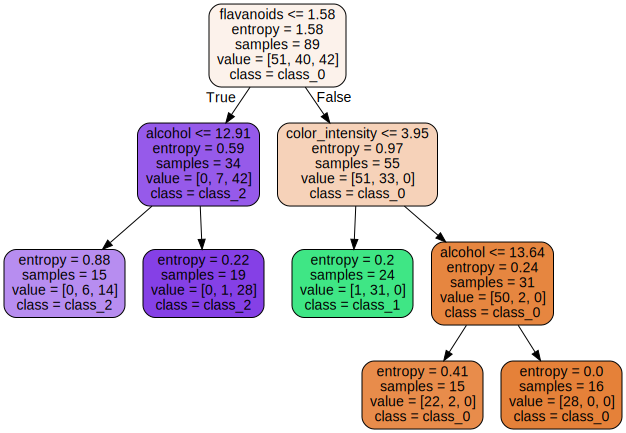

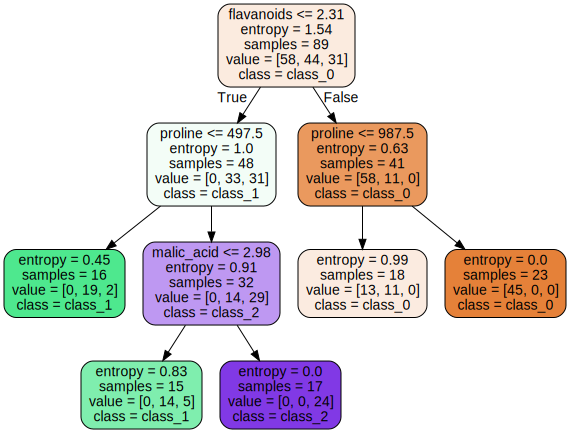

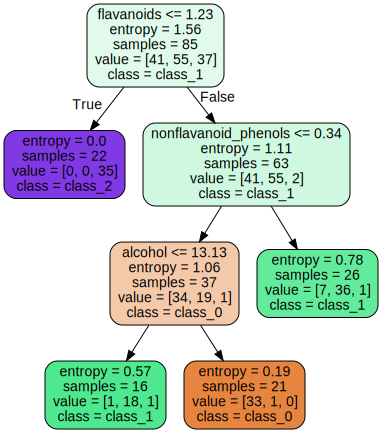

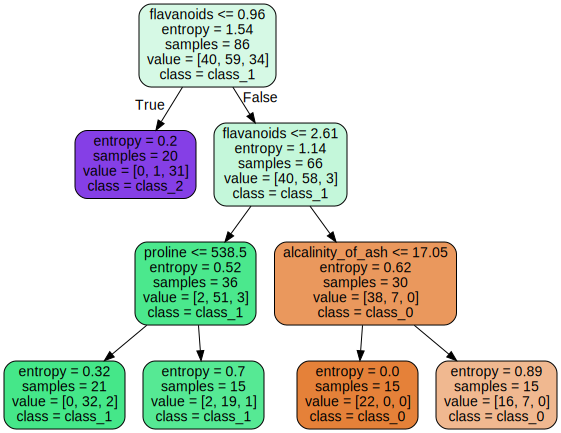

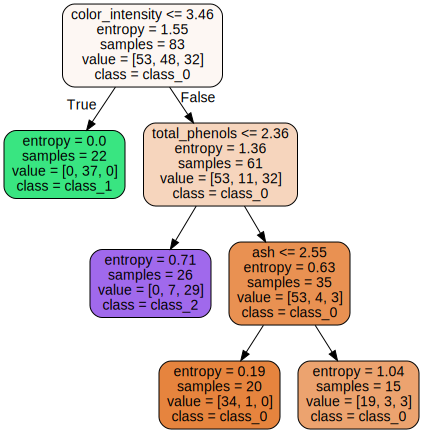

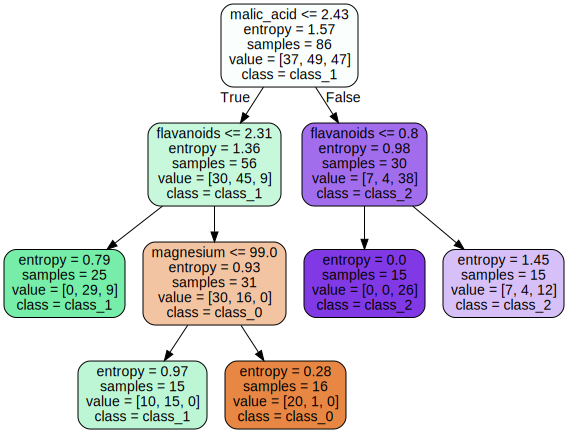

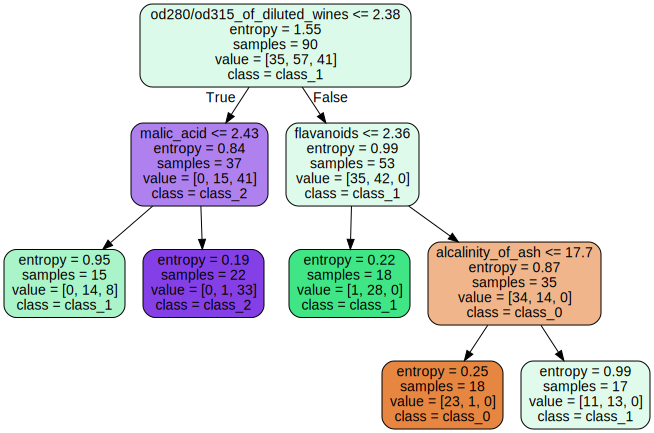

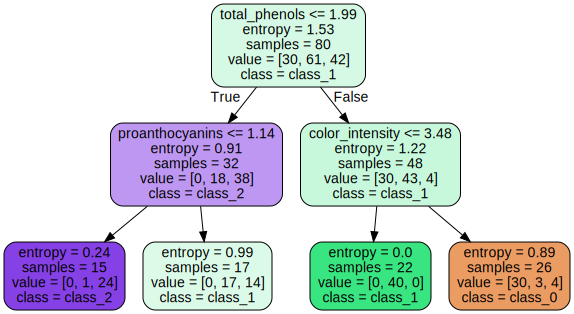

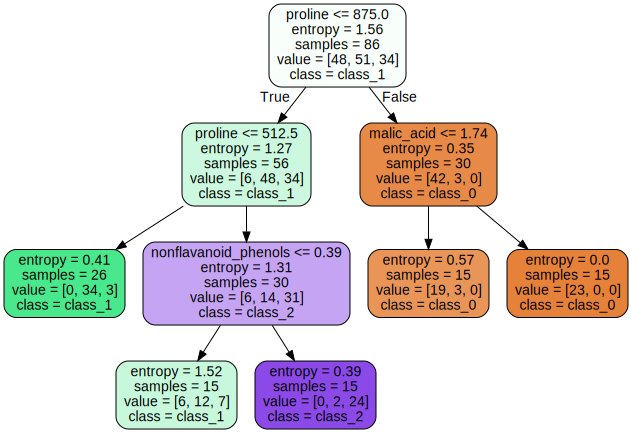

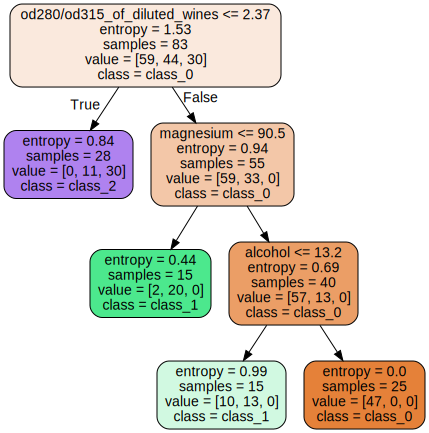

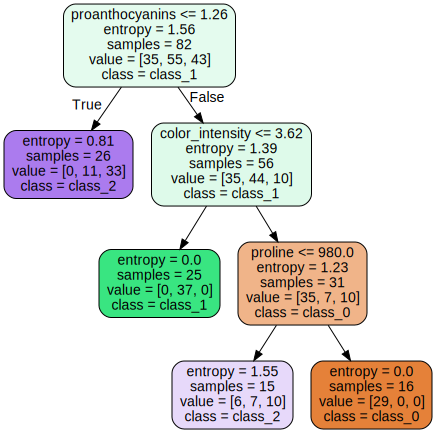

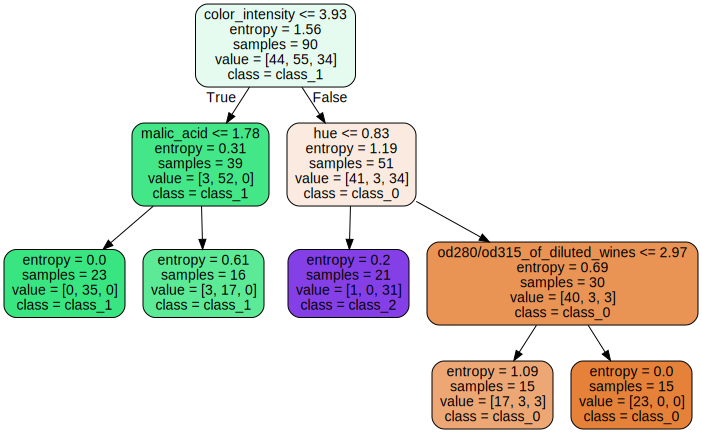

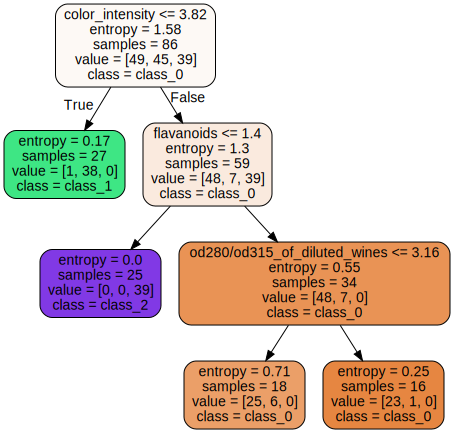

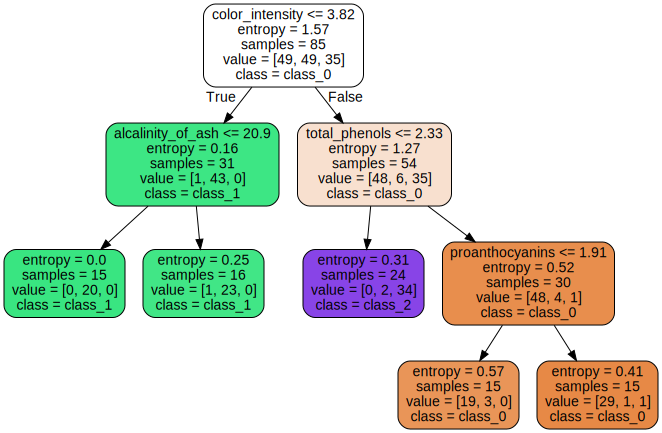

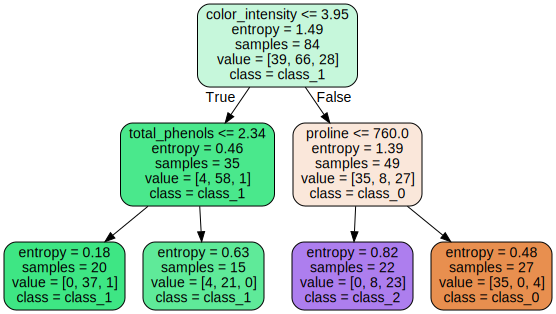

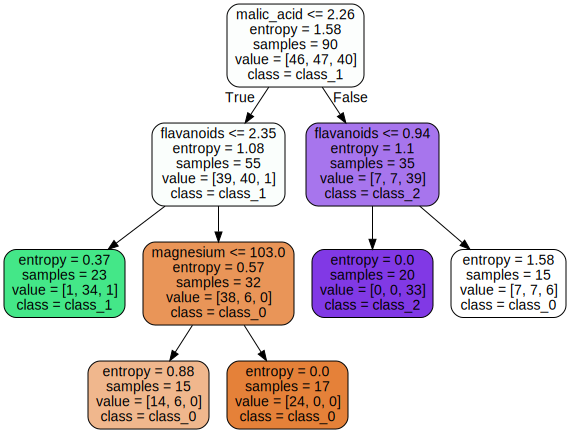

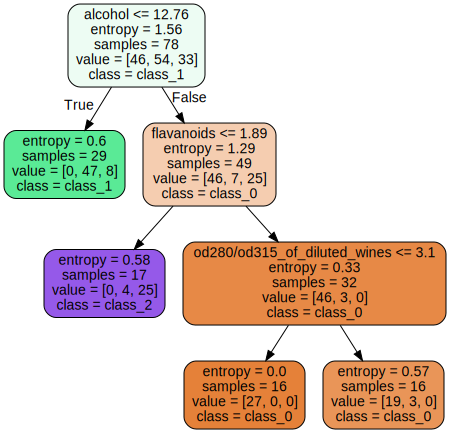

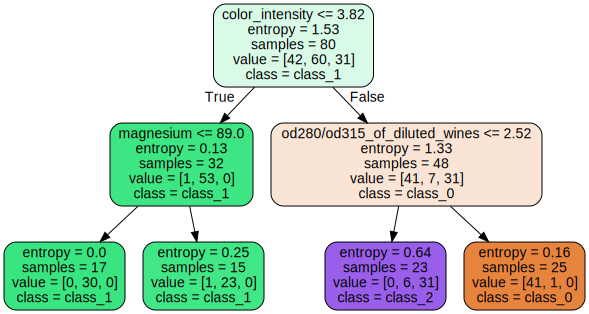

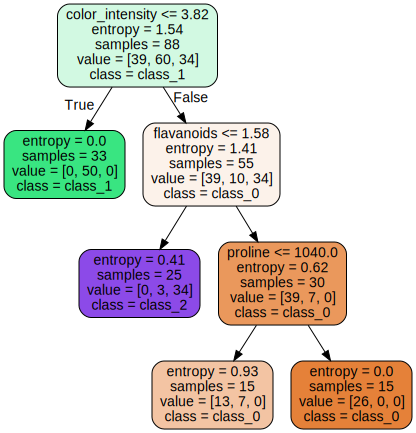

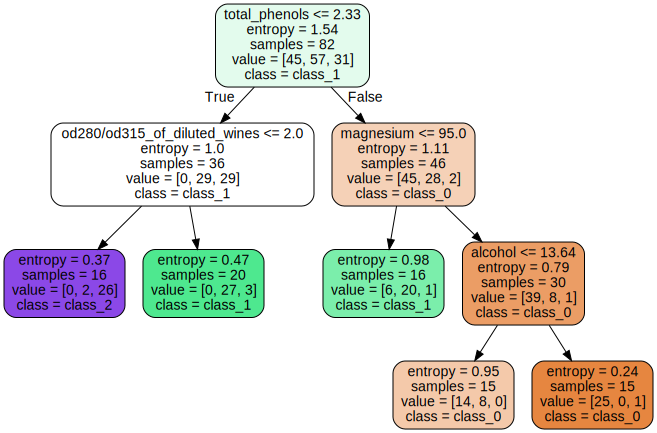

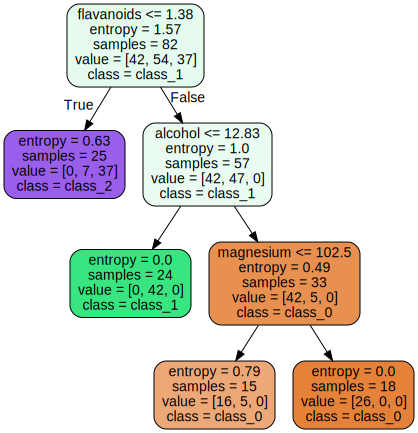

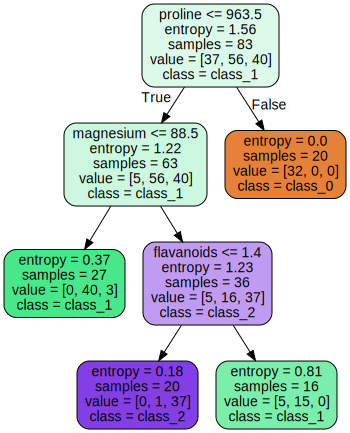

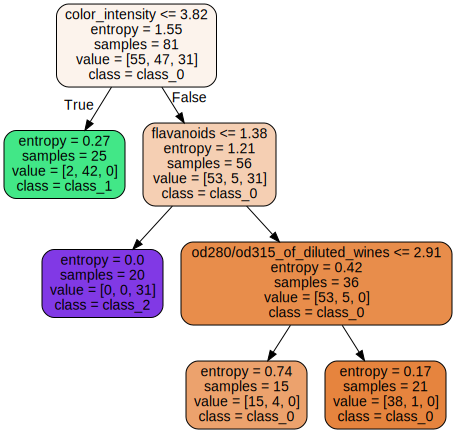

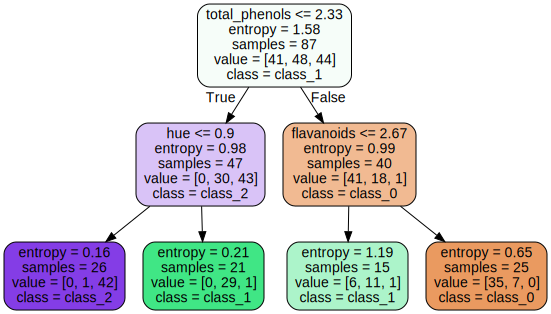

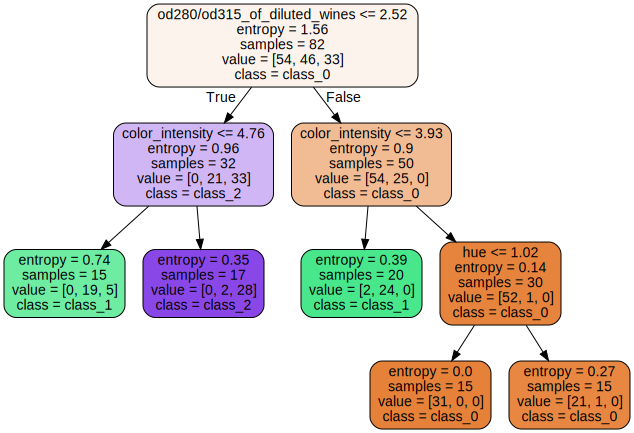

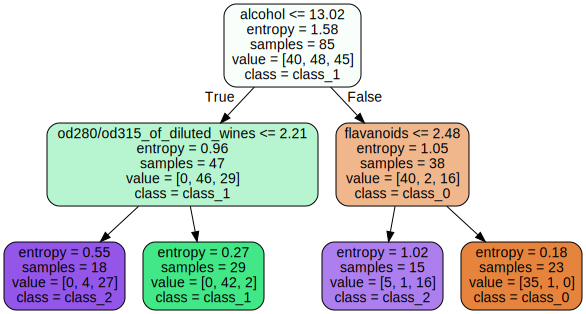

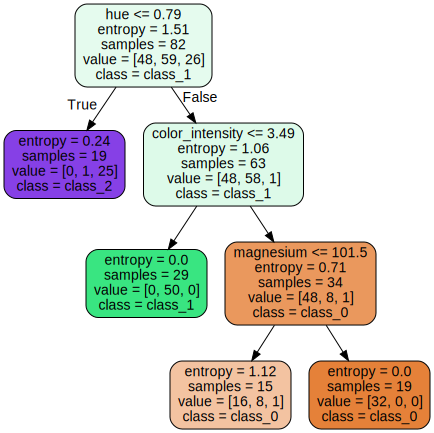

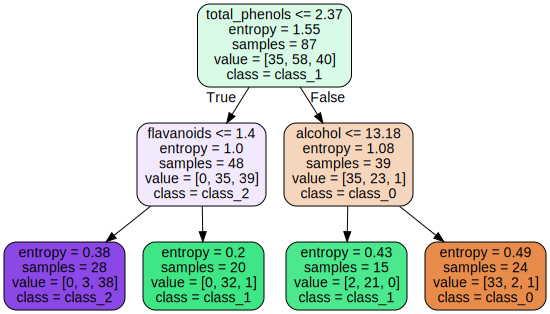

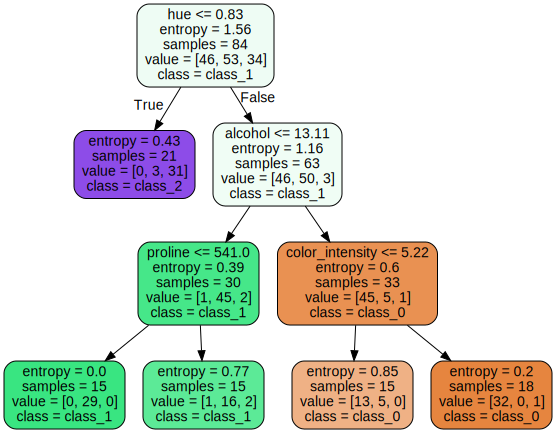

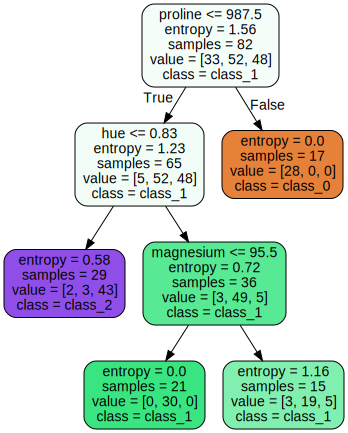

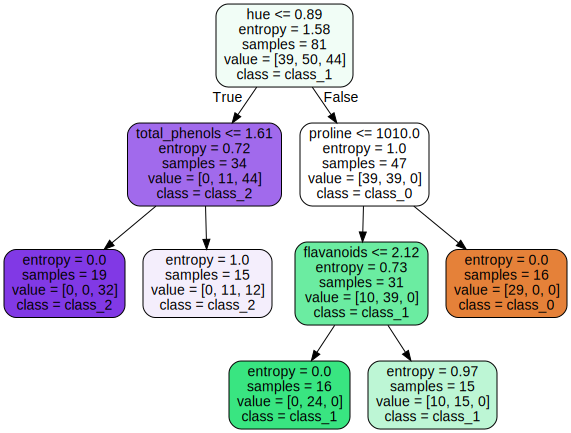

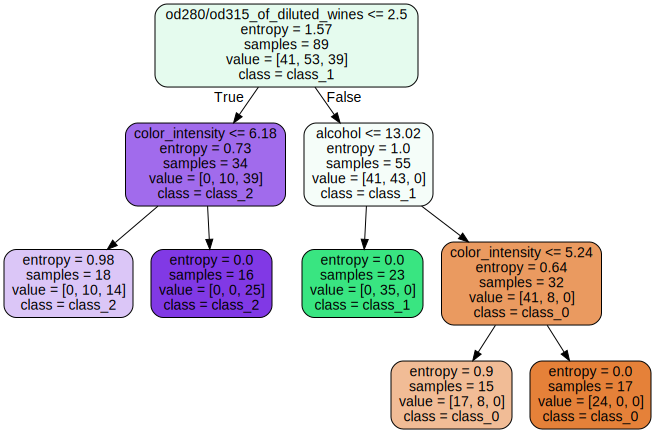

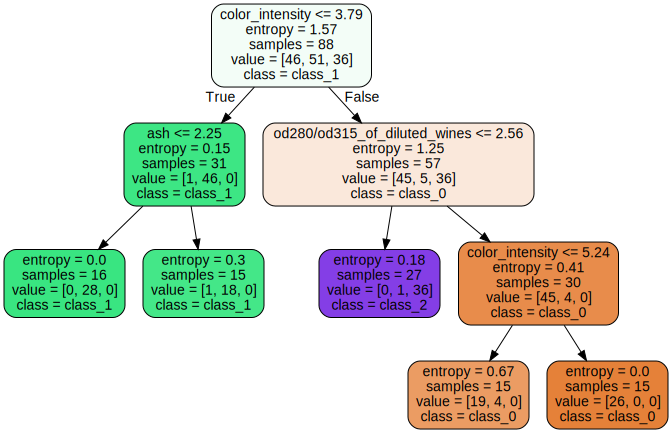

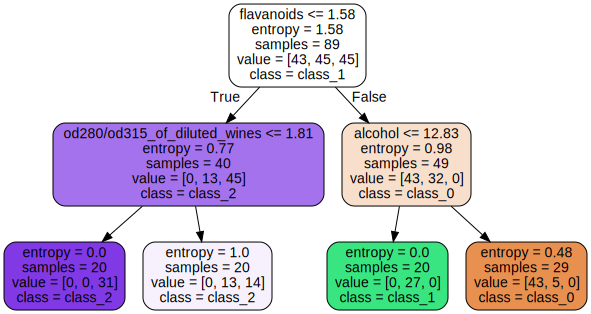

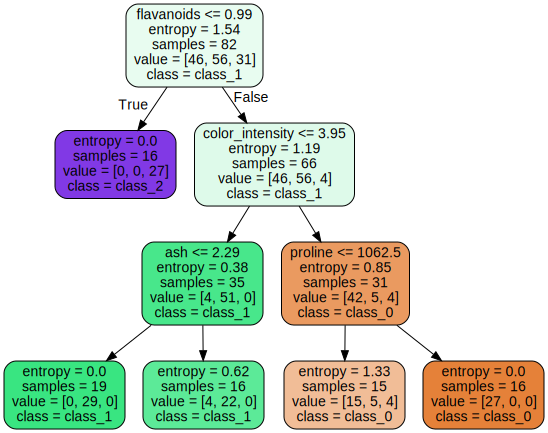

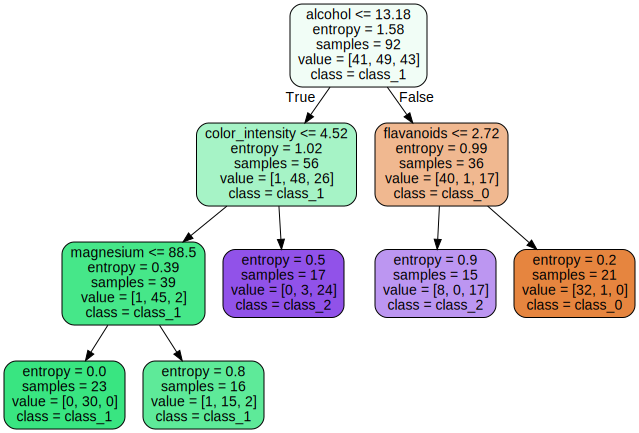

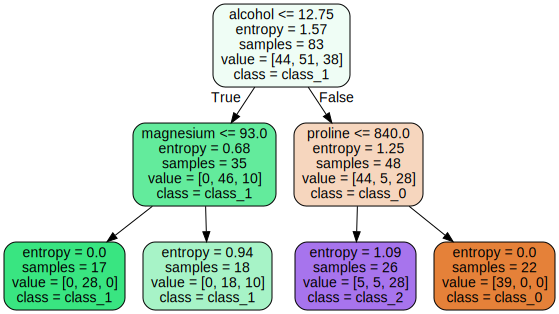

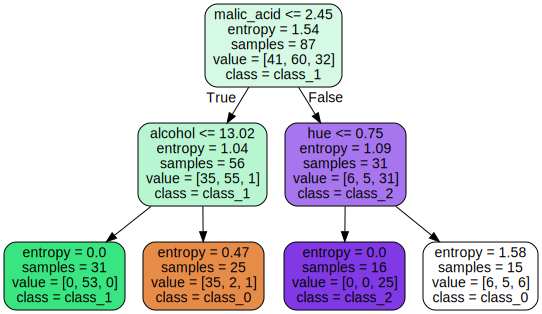

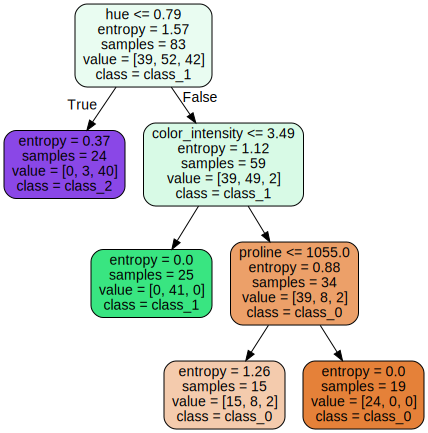

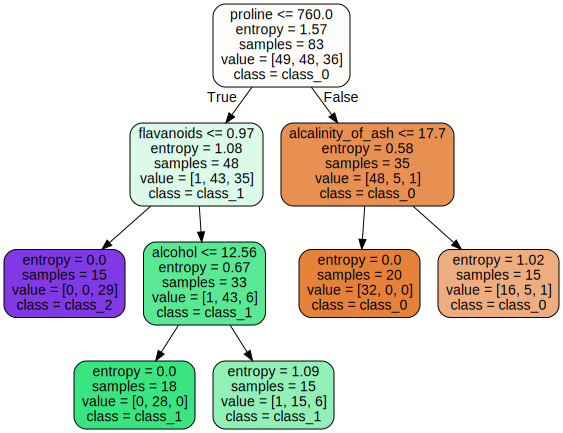

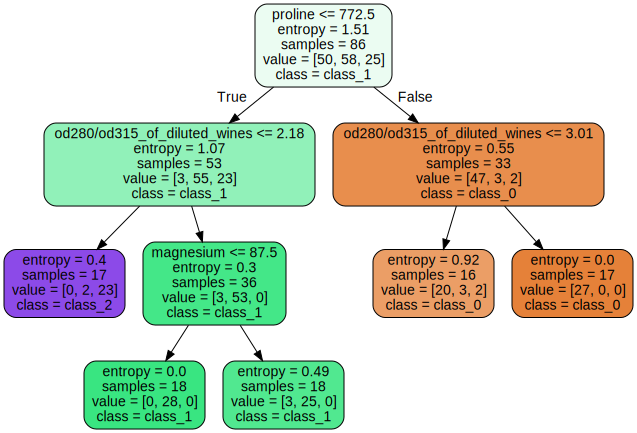

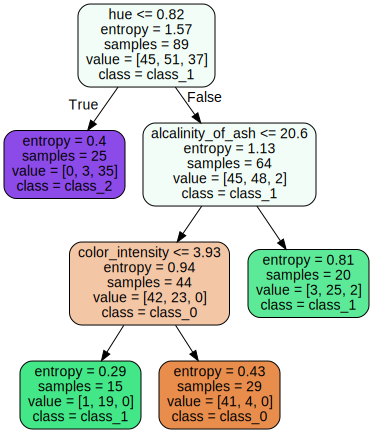

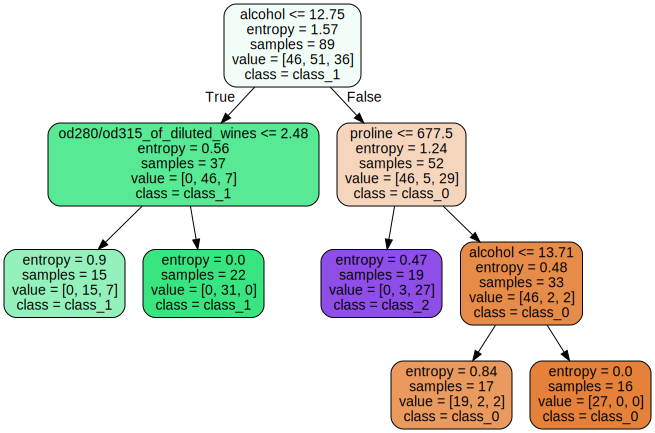

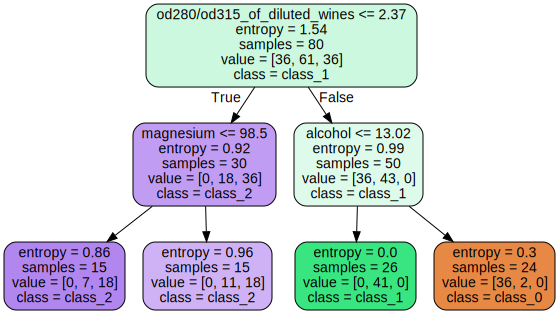

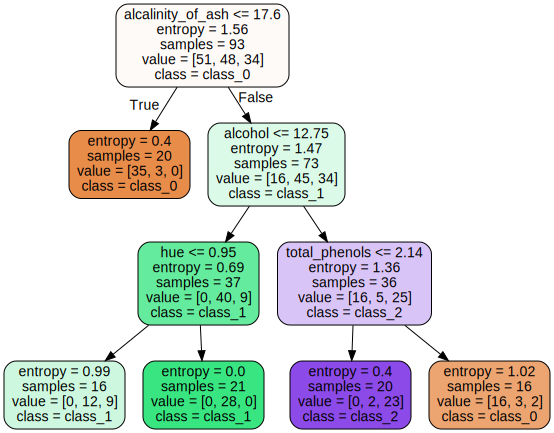

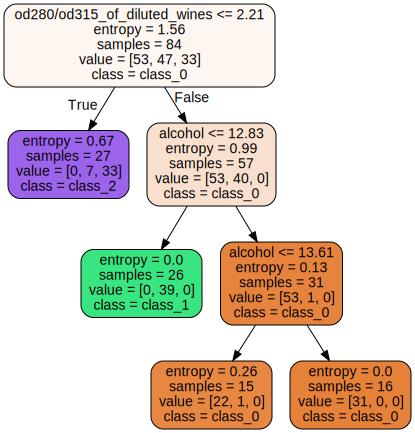

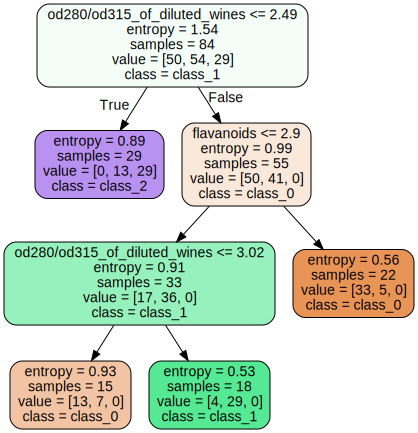

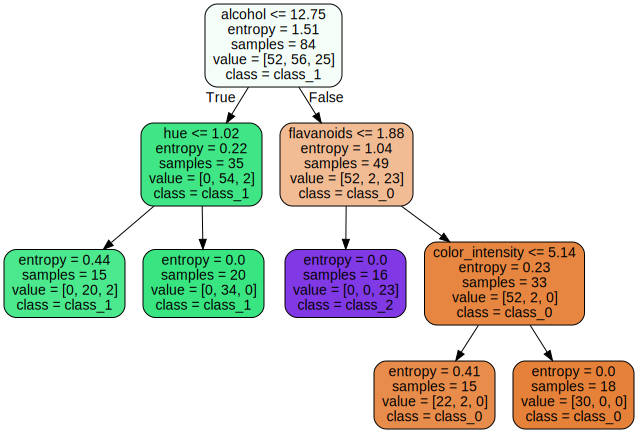

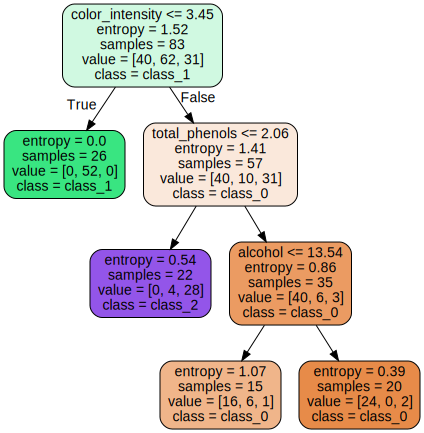

In [18]:
for i in range(50):
    estimator = forest.estimators_[i]

    from sklearn.tree import export_graphviz

    export_graphviz(estimator, out_file='rftree.dot',
               feature_names = data.feature_names,
               class_names = data.target_names,
               rounded = True, proportion = False,
               precision = 2, filled = True)

    import graphviz
    with open("rftree.dot") as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [20]:
import mglearn as mglearn

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt 
data = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

import matplotlib.pyplot as plt
import numpy as np

mlp= MLPRegressor( hidden_layer_sizes=(20,),
                 activation='relu',
                 solver='adam',
                 learning_rate='adaptive',
                 max_iter=2000,
                 learning_rate_init=0.01,
                 alpha=0.01,
                 random_state=0).fit(X_train, y_train)

print("Adjusted R2 on train: {:.3f}".format(mlp.score(X_train, y_train)))
print("Adjusted R2 on test: {:.3f}".format(mlp.score(X_test, y_test)))


Adjusted R2 on train: 0.435
Adjusted R2 on test: 0.432
